In [101]:
#!pip install xgboost  

### 載入訓練數據

In [102]:
import pandas as pd
import numpy as np

def cos_transform(x):
    return np.cos(x/90*np.pi)

df = pd.read_csv("s_result_all_1000.csv", index_col=0)
X = df.drop(['0','1','7','13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],axis='columns')     # 設置輸入變量
Y = df.loc[:, '0'].apply(cos_transform)
Y.head()

0    1.000000
1    0.999391
2    0.997564
3    0.994522
4    0.990268
Name: 0, dtype: float64

### 訓練模型

In [103]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
regr = DecisionTreeRegressor(max_depth=10) #6MB
#regr = RandomForestRegressor(max_depth=10, n_estimators=2) #155MB

#regr = GradientBoostingRegressor(learning_rate= 0.2,max_depth=10,subsample=0.7,n_estimators=10)#1.2MB
#regr = GradientBoostingClassifier(learning_rate= 0.2,max_depth=6,subsample=0.7,n_estimators=20)#170kB

regr.fit(X, Y)

DecisionTreeRegressor(max_depth=10)

### 保存模型

In [104]:
import pickle

# Dump the trained decision tree classifier with Pickle
decision_tree_pkl_filename = 'decision_tree_1.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(regr, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()


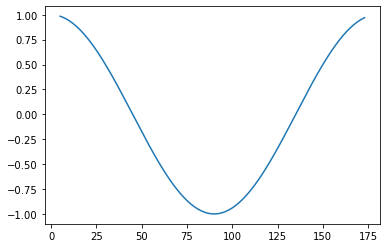

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
#print(np.around(regr_y_result))
plt.plot(Y[5:174])
